In [79]:
import pytz
import pandas as pd
import numpy as np
import datetime as dt


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 300
# help with layout
plt.rcParams.update({'figure.autolayout': True})


In [2]:
df = pd.read_csv('../data/reddit_chessbeginners.csv')

In [3]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [4]:
df.shape

(29732, 4)

In [12]:
df.sort_values(by = ['created_utc'], inplace = True)

In [13]:
df.head()

,title,created_utc,full_link,num_comments,GMT_time
29609,"Welcome to /r/ChessBeginners, the new subreddi...",1418346128,https://www.reddit.com/r/chessbeginners/commen...,5,2014-12-12 01:02:08+00:00
29622,"I know very minimal basics, but would love to ...",1420916613,https://www.reddit.com/r/chessbeginners/commen...,1,2015-01-10 19:03:33+00:00
29621,Notice! This subreddit has no moderation and r...,1421739152,https://www.reddit.com/r/chessbeginners/commen...,3,2015-01-20 07:32:32+00:00
29620,Do you already know how to play but can't seem...,1421798878,https://www.reddit.com/r/chessbeginners/commen...,0,2015-01-21 00:07:58+00:00
29619,Are you a complete beginner or the aspiring no...,1421875896,https://www.reddit.com/r/chessbeginners/commen...,3,2015-01-21 21:31:36+00:00


In [26]:
# Modified code from: https://stackoverflow.com/questions/52451105/python-converting-utc-millisecond-timestamp-to-local-time
def tz_from_utc_s_ts(utc_s_ts, tz_info):
    """Given second utc timestamp and a timezone return dateime

    :param utc_s_ts: Unix UTC timestamp in seconds
    :param tz_info: timezone info
    :return: timezone aware datetime
    """
    # convert from time stamp to datetime
    utc_datetime = dt.datetime.utcfromtimestamp(utc_s_ts)

    # set the timezone to UTC, and then convert to desired timezone
    return utc_datetime.replace(tzinfo=pytz.timezone('UTC')).astimezone(tz_info)

In [80]:
# Adding potentially useful columns
df['GMT_time'] = df['created_utc'].apply(lambda time_seconds: 
                                        tz_from_utc_s_ts(time_seconds, pytz.timezone('UTC')))
df['year'] = df['GMT_time'].apply(lambda date:  (date.strftime('%Y')))
df['month'] = df['GMT_time'].apply(lambda date:  (date.strftime('%m')))
df['day'] = df['GMT_time'].apply(lambda date:  (date.strftime('%d')))
df['hour'] = df['GMT_time'].apply(lambda date:  (date.strftime('%H')))

df['char_count'] = df['title'].apply(lambda text: len(text))
df['word_count'] = df['title'].apply(lambda text: len(text.split()))
med = df['num_comments'].median()
df['comm_greater_1'] = df['num_comments'].apply(lambda val: 1 if val > med else 0)



df.to_csv('../data/reddit_chessbeginners_full.csv', index=False)
df.head()

,title,created_utc,full_link,num_comments,GMT_time,year,month,day,hour,word_count,char_count,comm_greater_1
29609,"Welcome to /r/ChessBeginners, the new subreddit for all new chess players!",1418346128,https://www.reddit.com/r/chessbeginners/comments/2p159s/welcome_to_rchessbeginners_the_new_subreddit_for/,5,2014-12-12 01:02:08+00:00,2014,12,12,01,11,74,1
29622,"I know very minimal basics, but would love to learn more.",1420916613,https://www.reddit.com/r/chessbeginners/comments/2rzhp2/i_know_very_minimal_basics_but_would_love_to/,1,2015-01-10 19:03:33+00:00,2015,01,10,19,11,57,0
29621,"Notice! This subreddit has no moderation and r/chess is more equipped to handle beginners. However, please feel free to post here.",1421739152,https://www.reddit.com/r/chessbeginners/comments/2t13hx/notice_this_subreddit_has_no_moderation_and/,3,2015-01-20 07:32:32+00:00,2015,01,20,07,21,130,1
29620,Do you already know how to play but can't seem to improve? Head on over to chesstempo.com and use the tactics trainer as a start!,1421798878,https://www.reddit.com/r/chessbeginners/comments/2t41fx/do_you_already_know_how_to_play_but_cant_seem_to/,0,2015-01-21 00:07:58+00:00,2015,01,21,00,25,129,0
29619,"Are you a complete beginner or the aspiring novice? Chesscademy.com currently has nine lessons on a variety of topics, from moving the pieces to strategic prophylaxis!",1421875896,https://www.reddit.com/r/chessbeginners/comments/2t7r7k/are_you_a_complete_beginner_or_the_aspiring/,3,2015-01-21 21:31:36+00:00,2015,01,21,21,26,167,1


In [51]:
df['comm_greater_1'].value_counts(normalize=True)

0    0.510359
1    0.489641
Name: comm_greater_1, dtype: float64

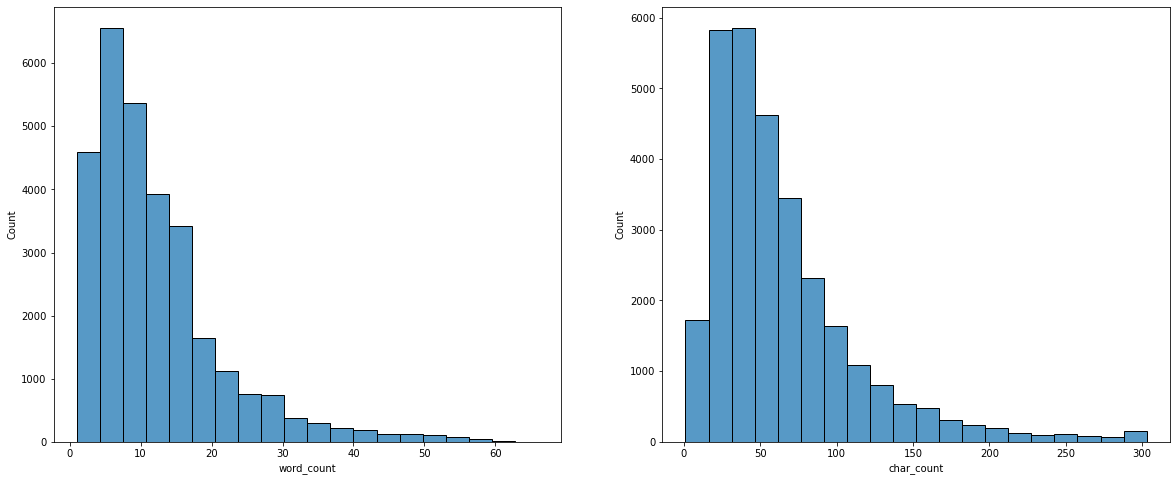

In [44]:
fig, ax = plt.subplots(1,2, figsize = (20,8))
sns.histplot(df['word_count'], ax=ax[0], bins = 20);
sns.histplot(df['char_count'], ax = ax[1], bins = 20);

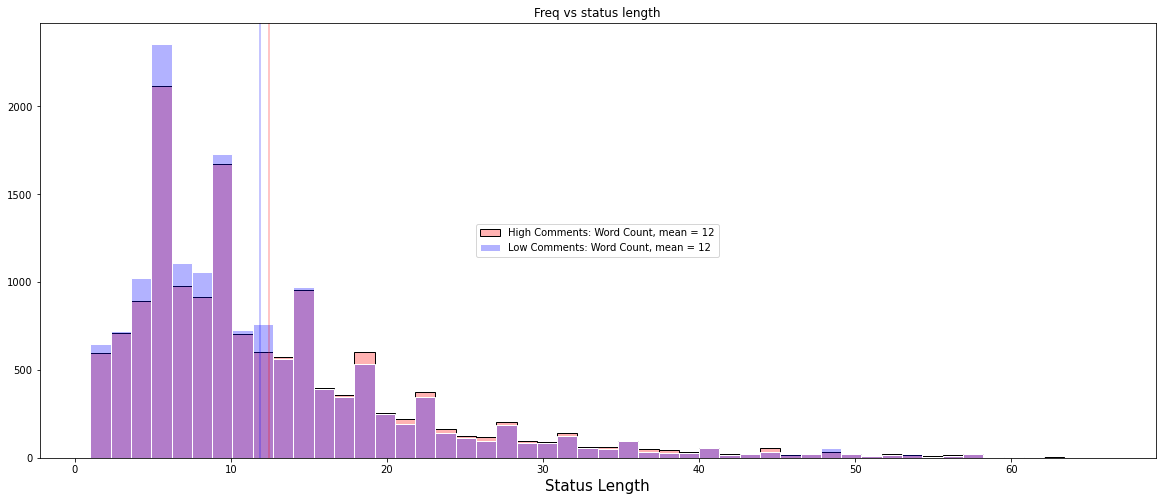

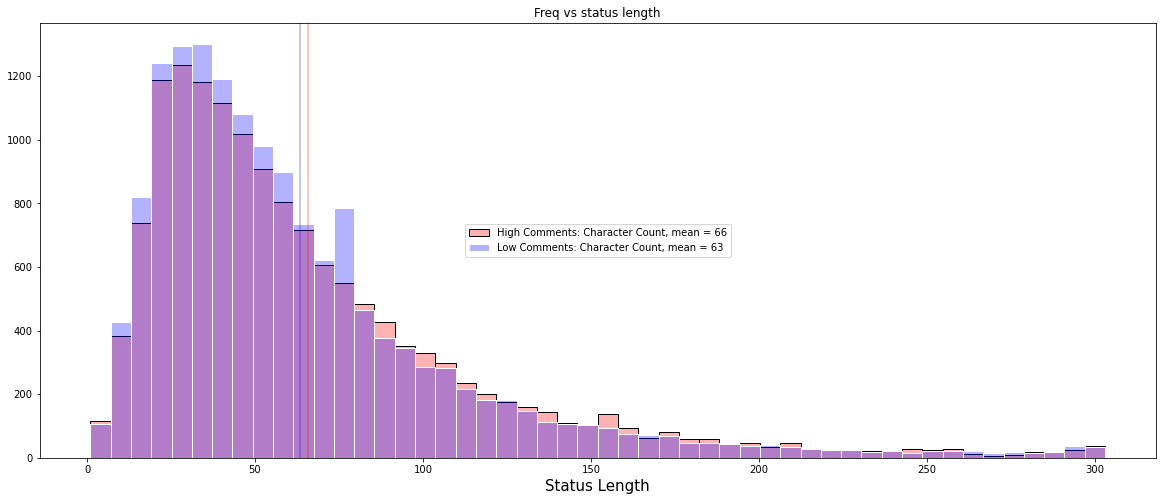

In [54]:
features = ['word_count', 'char_count']
labels = ['Word Count', 'Character Count']
color1 = (1,0,0,0.3)
color2 = (0,0,1,0.3)
target = df['comm_greater_1']
for i in range(len(features)):
    fig, ax = plt.subplots(figsize = (20,8))
    feature = features[i]
    bins = np.histogram(df[feature], bins=50)[1]
    lab = labels[i]
    avg_high_comments = df[target==1][feature].mean()
    avg_low_comments = df[target == 0][feature].mean()
    ax.hist(df[target==1][feature], bins = bins, label = f'High Comments: {lab}, mean = {round(avg_high_comments)}', color = color1,edgecolor='k');
    ax.hist(df[target==0][feature], bins = bins, label = f'Low Comments: {lab}, mean = {round(avg_low_comments)}', color = color2, edgecolor='w');
    ax.axvline(avg_high_comments, color = color1)
    ax.axvline(avg_low_comments, color = color2)

    ax.set_xlabel(f'Status Length', size=15)
    ax.set(title = f'Freq vs status length')
    ax.legend(loc='center');

# Modeling

In [59]:
cv = CountVectorizer(stop_words='english')

cv.fit(df['title'])
words_df = pd.DataFrame(cv.transform(df['title']).A, columns = cv.get_feature_names_out())
print(f'shape of words df = {words_df.shape}')
words_df.head()

shape of words df = (29732, 11528)


,00,000,000th,001st,0054,006,007,01,01s,02,...,يخص,අක,අද,ඉත,උසස,තන,රය,වර,对抗大炮,인터넷바둑이
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
words_df['000'].value_counts()

0    29708
1       24
Name: 000, dtype: int64

In [62]:
# k most common words
top_k = 25
words_df.sum().sort_values(ascending=False)[:top_k]

chess        5711
game         4590
mate         2204
just         1830
queen        1822
white        1769
black        1739
best         1584
checkmate    1511
play         1472
win          1354
com          1308
got          1217
time         1192
playing      1176
played       1148
games        1128
opponent     1097
finally      1090
good         1062
brilliant    1061
moves        1027
elo          1022
pawn          968
like          964
dtype: int64

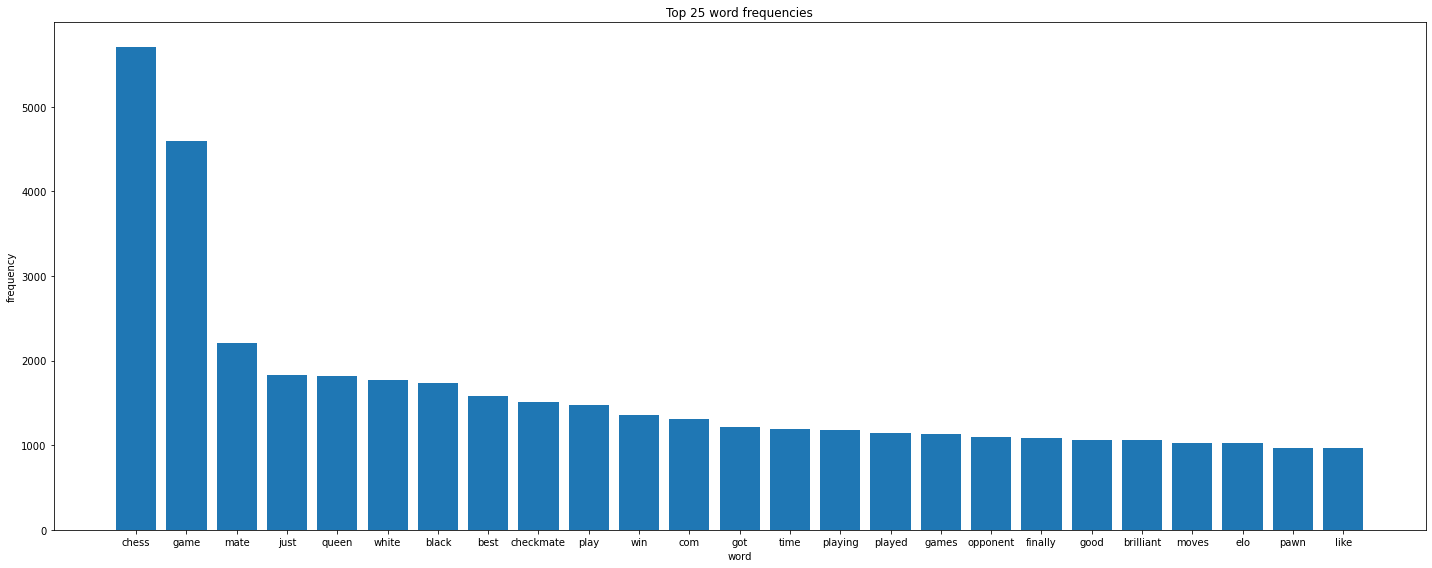

In [66]:

fig, ax = plt.subplots(figsize = (20,8))
ax.bar(x=words_df.sum().sort_values(ascending=False)[:top_k].index, height=words_df.sum().sort_values(ascending=False)[:top_k]);
ax.set(title = f'Top {top_k} word frequencies', xlabel = 'word', ylabel = 'frequency')
plt.show()

In [70]:
# excluding stopwords
cv_bigrams = CountVectorizer(ngram_range=(2,2), stop_words='english')
cv_bigrams.fit(df['title'])
X_train_bigrams = cv_bigrams.transform(df['title'])
pd.DataFrame(X_train_bigrams.A, columns=cv_bigrams.get_feature_names_out()).sum().sort_values(ascending = False)[:10]


chess com          1270
guess elo           225
best game           204
playing chess       196
new chess           190
white play          187
started playing     180
ve played           165
got brilliant       152
don know            150
dtype: int64